2D AND 3D VERIFICATION AND VALIDATION OF THE LATTICE BOLTZMANN METHOD

https://publications.polymtl.ca/1927/1/2015_MatteoPortinari.pdf

Lattice Boltzmann Method Simulation of 3-D Natural Convection with Double MRT Model

https://arxiv.org/pdf/1511.04633.pdf

Multiple-relaxation-time Lattice Boltzmann Models in 3D

https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/20020075050.pdf

Multiple-relaxation-time lattice Boltzmann model for the convection and anisotropic diffusion equation

https://www.researchgate.net/publication/222659771_Multiple-relaxation-time_lattice_Boltzmann_model_for_the_convection_and_anisotropic_diffusion_equation

In [1]:
import sympy
sympy.init_printing(use_unicode=True)

In [2]:
# kinematic viscosity
nu = sympy.symbols('nu')

In [3]:
# LBM velocity vectors for D3Q19 (and D3Q7)
ei = sympy.Matrix([
    [0,0,0],
    [1,0,0],
    [-1,0,0],
    [0,1,0],
    [0,-1,0],
    [0,0,1],
    [0,0,-1],
    [1,1,0],
    [-1,-1,0],
    [1,-1,0 ],
    [-1, 1, 0],
    [1, 0, 1],
    [-1, 0, -1],
    [1, 0, -1],
    [-1, 0, 1],
    [0, 1, 1],
    [0, -1, -1],
    [0, 1, -1],
    [0, -1, 1]
])

print(ei.shape)
print(ei)

(19, 3)
Matrix([[0, 0, 0], [1, 0, 0], [-1, 0, 0], [0, 1, 0], [0, -1, 0], [0, 0, 1], [0, 0, -1], [1, 1, 0], [-1, -1, 0], [1, -1, 0], [-1, 1, 0], [1, 0, 1], [-1, 0, -1], [1, 0, -1], [-1, 0, 1], [0, 1, 1], [0, -1, -1], [0, 1, -1], [0, -1, 1]])


In [4]:
# Density weighting factors for D3Q19 velocity PDFs
e_omega = sympy.Matrix([
    1/3,
    1/18,
    1/18,
    1/18,
    1/18,
    1/18,
    1/18,
    1/36,
    1/36,
    1/36,
    1/36,
    1/36,
    1/36,
    1/36,
    1/36,
    1/36,
    1/36,
    1/36,
    1/36
])

# Density weighting factors for D3Q7 energy PDFs
e_omegaT = sympy.Matrix([
    1/4,
    1/8,
    1/8,
    1/8,
    1/8,
    1/8,
    1/8
])

print(e_omega.shape)
print(e_omega)
print(e_omegaT.shape)
print(e_omega)

(19, 1)
Matrix([[0.333333333333333], [0.0555555555555556], [0.0555555555555556], [0.0555555555555556], [0.0555555555555556], [0.0555555555555556], [0.0555555555555556], [0.0277777777777778], [0.0277777777777778], [0.0277777777777778], [0.0277777777777778], [0.0277777777777778], [0.0277777777777778], [0.0277777777777778], [0.0277777777777778], [0.0277777777777778], [0.0277777777777778], [0.0277777777777778], [0.0277777777777778]])
(7, 1)
Matrix([[0.333333333333333], [0.0555555555555556], [0.0555555555555556], [0.0555555555555556], [0.0555555555555556], [0.0555555555555556], [0.0555555555555556], [0.0277777777777778], [0.0277777777777778], [0.0277777777777778], [0.0277777777777778], [0.0277777777777778], [0.0277777777777778], [0.0277777777777778], [0.0277777777777778], [0.0277777777777778], [0.0277777777777778], [0.0277777777777778], [0.0277777777777778]])


In [5]:
def phi(ei):
    p0 = ei.norm()**0
    p1 = 19*ei.norm()**2 - 30
    p2 = (21*ei.norm()**4 - 53*ei.norm()**2 + 24)/2
    p3 = ei[0]
    p5 = ei[1]
    p7 = ei[2]
    p4 = (5*ei.norm()**2 - 9)*ei[0]
    p6 = (5*ei.norm()**2 - 9)*ei[1]
    p8 = (5*ei.norm()**2 - 9)*ei[2]
    p9 = 3*ei[0]**2 - ei.norm()**2
    p11 = ei[1]**2 - ei[2]**2
    p13 = ei[0]*ei[1]
    p14 = ei[1]*ei[2]
    p15 = ei[0]*ei[2]
    p10 = (3*ei.norm()**2 - 5)*(3*ei[0]**2 - ei.norm()**2)
    p12 = (3*ei.norm()**2 - 5)*(ei[1]**2 - ei[2]**2)
    p16 = (ei[1]**2 - ei[2]**2)*ei[0]
    p17 = (ei[2]**2 - ei[0]**2)*ei[1]
    p18 = (ei[0]**2 - ei[1]**2)*ei[2]
    return [p0, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14, p15, p16, p17, p18]

def chi(ei):
    p0 = ei.norm()**0
    p1 = ei[0]
    p2 = ei[1]
    p3 = ei[2]
    p4 = 6 - 7*ei.norm()**2
    p5 = 3*ei[0]**2 - ei.norm()**2
    p6 = ei[1]**2 - ei[2]**2
    return [p0, p1, p2, p3, p4, p5, p6]

# Transformation matrix for transition from velocity to moment space
M = sympy.Matrix([phi(ei.row(i)) for i in range(0, 19)]).transpose()
M_inv = M**-1

# Transformation matrix for transition from energy PDFs to moment space
N = sympy.Matrix([chi(ei.row(i)) for i in range(0, 7)]).transpose()
N_inv = N**-1

print(M.shape)
print(M)
print(N.shape)
print(N)

(19, 19)
Matrix([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [-30, -11, -11, -11, -11, -11, -11, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [12, -4, -4, -4, -4, -4, -4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, -1, 0, 0, 0, 0, 1, -1, 1, -1, 1, -1, 1, -1, 0, 0, 0, 0], [0, -4, 4, 0, 0, 0, 0, 1, -1, 1, -1, 1, -1, 1, -1, 0, 0, 0, 0], [0, 0, 0, 1, -1, 0, 0, 1, -1, -1, 1, 0, 0, 0, 0, 1, -1, 1, -1], [0, 0, 0, -4, 4, 0, 0, 1, -1, -1, 1, 0, 0, 0, 0, 1, -1, 1, -1], [0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 1, -1, -1, 1, 1, -1, -1, 1], [0, 0, 0, 0, 0, -4, 4, 0, 0, 0, 0, 1, -1, -1, 1, 1, -1, -1, 1], [0, 2, 2, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -2, -2, -2, -2], [0, -4, -4, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, -2, -2, -2, -2], [0, 0, 0, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 0, 0, 0, 0], [0, 0, 0, -2, -2, 2, 2, 1, 1, 1, 1, -1, -1, -1, -1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, -1, -1], [0, 0, 0, 0, 0, 0

In [6]:
s1 = s4 = s6 = s8 = 0
s2 = 1.19
s3 = s11 = s13 = 1.4
s5 = s7 = s9 = 1.2
s17 = s18 = s19 = 1.98
s10 = s12 = s14 = s15 = s16 = 2/(1 + 6*nu)
# Collision matrix for velocities in moment space
S_hat = sympy.diag(s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12, s13, s14, s15, s16, s17, s18, s19)

print(S_hat.shape)
print(S_hat)

(19, 19)
Matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1.19000000000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1.40000000000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1.20000000000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1.20000000000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1.20000000000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 2/(6*nu + 1), 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.40000000000000, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2/(6*nu + 1), 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.40000000000000, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2/(6*nu + 1), 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 

In [7]:
def eq(m):
    rho = m[0] # density
    en = m[1] # energy
    epsilon = m[2] # energy square
    jx = m[3] # momentum
    qx = m[4] # energy flux
    jy = m[5]
    qy = m[6]
    jz = m[7]
    qz = m[8]
    pxx = m[9]/3 # symmetric viscous stress tensor
    pixx = m[10]/3
    pww = m[11]
    piww = m[12]
    pxy = m[13]
    pyz = m[14]
    pxz = m[15]
    mx = m[16] # antisymmetric third-order moment
    my = m[17]
    mz = m[18]

    omega_e = 0 # model stability constants
    omega_xx = 0
    omega_ej = -475/63
    rho_0 = 1 #  mean density in system

    rho_eq = rho
    en_eq = -11*rho + 19/rho_0*(jx*jx + jy*jy + jz*jz)
    epsilon_eq = omega_e*rho + omega_ej/rho_0*(jx*jx + jy*jy + jz*jz)
    jx_eq = jx
    qx_eq = -2/3*jx
    jy_eq = jy
    qy_eq = -2/3*jy
    jz_eq = jz
    qz_eq = -2/3*jz
    pxx_eq = 1/rho_0*(2*jx*jx - (jy*jy + jz*jz))
    pixx_eq = omega_xx*1/rho_0*(2*jx*jx - (jy*jy + jz*jz))
    pww_eq = 1/rho_0*(jy*jy - jz*jz)
    piww_eq = omega_xx/rho_0*(jy*jy - jz*jz)
    pxy_eq = jx*jy/rho_0
    pyz_eq = jy*jz/rho_0
    pxz_eq = jx*jz/rho_0
    mx_eq = 0
    my_eq = 0
    mz_eq = 0
    return sympy.Matrix([rho_eq, en_eq, epsilon_eq, jx_eq, qx_eq, jy_eq, qy_eq, jz_eq, qz_eq, pxx_eq, pixx_eq, pww_eq, piww_eq, pxy_eq, pyz_eq, pxz_eq, mx_eq, my_eq, mz_eq])

In [8]:
f = sympy.Matrix([sympy.symbols(f'f{i}') for i in range(0, 19)])

print(f.shape)
print(f)

(19, 1)
Matrix([[f0], [f1], [f2], [f3], [f4], [f5], [f6], [f7], [f8], [f9], [f10], [f11], [f12], [f13], [f14], [f15], [f16], [f17], [f18]])


In [42]:
rho = (sympy.ones(1, 19)*f)[0]
#rho = sympy.symbols('rho')
vx = (sympy.Matrix([ei.row(i)[0] for i in range (0, 19)]).transpose()*f)[0]
vy = (sympy.Matrix([ei.row(i)[1] for i in range (0, 19)]).transpose()*f)[0]
vz = (sympy.Matrix([ei.row(i)[2] for i in range (0, 19)]).transpose()*f)[0]
V = sympy.Matrix([vx, vy, vz])
#V = sympy.Matrix([sympy.symbols('vx'), sympy.symbols('vy'), sympy.symbols('vz')])

print(rho)
print(vx)
print(vy)
print(vz)

f0 + f1 + f10 + f11 + f12 + f13 + f14 + f15 + f16 + f17 + f18 + f2 + f3 + f4 + f5 + f6 + f7 + f8 + f9
f1 - f10 + f11 - f12 + f13 - f14 - f2 + f7 - f8 + f9
f10 + f15 - f16 + f17 - f18 + f3 - f4 + f7 - f8 - f9
f11 - f12 - f13 + f14 + f15 - f16 - f17 + f18 + f5 - f6


In [43]:
def feq(ei):
    cs2 = 1/3 # Speed of sound squared
    return rho*e_omega*(1 + ei.dot(V)/cs2 + (ei.dot(V))**2/(2*cs2**2) - V.dot(V)/(2*cs2))
f_eq = sympy.Matrix([feq(ei.row(i)) for i in range(0, 19)])
print(f_eq)

*f12 + 3.0*f13 - 3.0*f14 + 6.0*f17 - 6.0*f18 + 3.0*f3 - 3.0*f4 - 3.0*f5 + 3.0*f6 + 3.0*f7 - 3.0*f8 - 3.0*f9 - 1.5*(f1 - f10 + f11 - f12 + f13 - f14 - f2 + f7 - f8 + f9)**2 - 1.5*(f10 + f15 - f16 + f17 - f18 + f3 - f4 + f7 - f8 - f9)**2 - 1.5*(f11 - f12 - f13 + f14 + f15 - f16 - f17 + f18 + f5 - f6)**2 + 4.5*(f10 - f11 + f12 + f13 - f14 + 2*f17 - 2*f18 + f3 - f4 - f5 + f6 + f7 - f8 - f9)**2 + 1)], [(0.0277777777777778*f0 + 0.0277777777777778*f1 + 0.0277777777777778*f10 + 0.0277777777777778*f11 + 0.0277777777777778*f12 + 0.0277777777777778*f13 + 0.0277777777777778*f14 + 0.0277777777777778*f15 + 0.0277777777777778*f16 + 0.0277777777777778*f17 + 0.0277777777777778*f18 + 0.0277777777777778*f2 + 0.0277777777777778*f3 + 0.0277777777777778*f4 + 0.0277777777777778*f5 + 0.0277777777777778*f6 + 0.0277777777777778*f7 + 0.0277777777777778*f8 + 0.0277777777777778*f9)*(3.0*f10 - 3.0*f11 + 3.0*f12 + 3.0*f13 - 3.0*f14 + 6.0*f17 - 6.0*f18 + 3.0*f3 - 3.0*f4 - 3.0*f5 + 3.0*f6 + 3.0*f7 - 3.0*f8 - 3.0*f9 - 

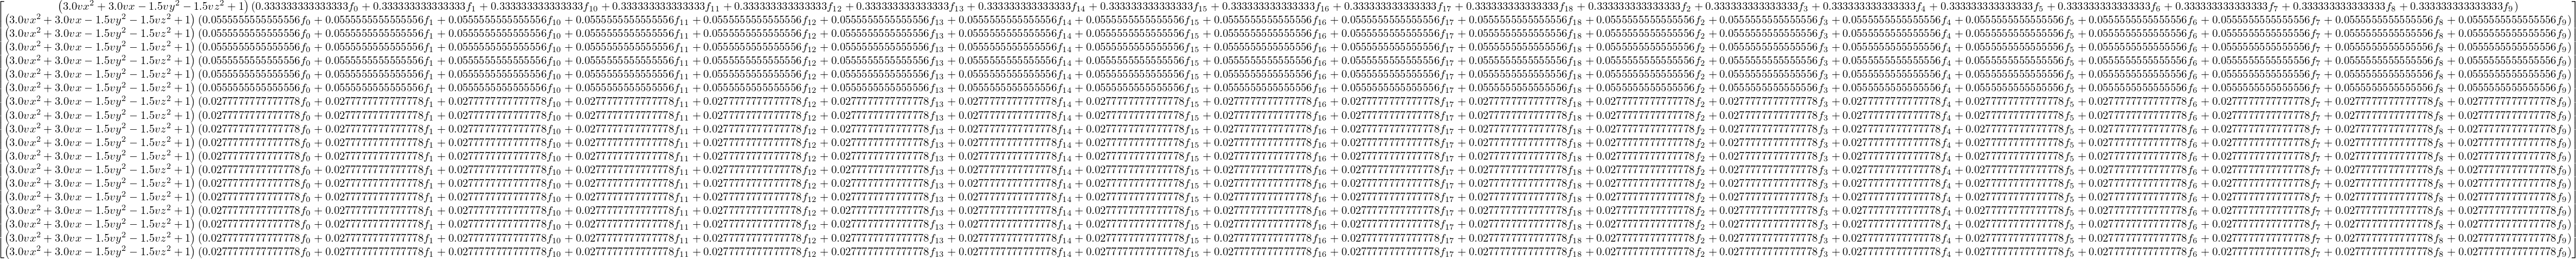

In [37]:
cs2 = 1/3
#ei.row(1)*V/cs2 + (ei.row(1)*V)**2/(2*cs2*cs2) - V**2/(2*cs2)
rho*e_omega*(1 + ei.row(1).dot(V)/cs2 + (ei.row(1).dot(V))**2/(2*cs2*cs2) - V.dot(V)/(2*cs2))

In [10]:
m = M*f
print(m.shape)
print(m)

(19, 1)
Matrix([[f0 + f1 + f10 + f11 + f12 + f13 + f14 + f15 + f16 + f17 + f18 + f2 + f3 + f4 + f5 + f6 + f7 + f8 + f9], [-30*f0 - 11*f1 + 8*f10 + 8*f11 + 8*f12 + 8*f13 + 8*f14 + 8*f15 + 8*f16 + 8*f17 + 8*f18 - 11*f2 - 11*f3 - 11*f4 - 11*f5 - 11*f6 + 8*f7 + 8*f8 + 8*f9], [12*f0 - 4*f1 + f10 + f11 + f12 + f13 + f14 + f15 + f16 + f17 + f18 - 4*f2 - 4*f3 - 4*f4 - 4*f5 - 4*f6 + f7 + f8 + f9], [f1 - f10 + f11 - f12 + f13 - f14 - f2 + f7 - f8 + f9], [-4*f1 - f10 + f11 - f12 + f13 - f14 + 4*f2 + f7 - f8 + f9], [f10 + f15 - f16 + f17 - f18 + f3 - f4 + f7 - f8 - f9], [f10 + f15 - f16 + f17 - f18 - 4*f3 + 4*f4 + f7 - f8 - f9], [f11 - f12 - f13 + f14 + f15 - f16 - f17 + f18 + f5 - f6], [f11 - f12 - f13 + f14 + f15 - f16 - f17 + f18 - 4*f5 + 4*f6], [2*f1 + f10 + f11 + f12 + f13 + f14 - 2*f15 - 2*f16 - 2*f17 - 2*f18 + 2*f2 - f3 - f4 - f5 - f6 + f7 + f8 + f9], [-4*f1 + f10 + f11 + f12 + f13 + f14 - 2*f15 - 2*f16 - 2*f17 - 2*f18 - 4*f2 + 2*f3 + 2*f4 + 2*f5 + 2*f6 + f7 + f8 + f9], [f10 - f11 - f12 - f

In [11]:
m_eq = eq(m)
print(m_eq.shape)
print(m_eq)

(19, 1)
Matrix([[f0 + f1 + f10 + f11 + f12 + f13 + f14 + f15 + f16 + f17 + f18 + f2 + f3 + f4 + f5 + f6 + f7 + f8 + f9], [-11*f0 - 11*f1 - 11*f10 - 11*f11 - 11*f12 - 11*f13 - 11*f14 - 11*f15 - 11*f16 - 11*f17 - 11*f18 - 11*f2 - 11*f3 - 11*f4 - 11*f5 - 11*f6 - 11*f7 - 11*f8 - 11*f9 + 19.0*(f1 - f10 + f11 - f12 + f13 - f14 - f2 + f7 - f8 + f9)**2 + 19.0*(f10 + f15 - f16 + f17 - f18 + f3 - f4 + f7 - f8 - f9)**2 + 19.0*(f11 - f12 - f13 + f14 + f15 - f16 - f17 + f18 + f5 - f6)**2], [-7.53968253968254*(f1 - f10 + f11 - f12 + f13 - f14 - f2 + f7 - f8 + f9)**2 - 7.53968253968254*(f10 + f15 - f16 + f17 - f18 + f3 - f4 + f7 - f8 - f9)**2 - 7.53968253968254*(f11 - f12 - f13 + f14 + f15 - f16 - f17 + f18 + f5 - f6)**2], [f1 - f10 + f11 - f12 + f13 - f14 - f2 + f7 - f8 + f9], [-0.666666666666667*f1 + 0.666666666666667*f10 - 0.666666666666667*f11 + 0.666666666666667*f12 - 0.666666666666667*f13 + 0.666666666666667*f14 + 0.666666666666667*f2 - 0.666666666666667*f7 + 0.666666666666667*f8 - 0.6666666666

In [12]:
m_diff = m - m_eq
m_relax = S_hat*m_diff
f_diff = -M_inv*m_relax
print(f_diff.shape)
print(f_diff)

445*f14 + 0.00388888888888887*f15 + 0.403888888888889*f16 + 0.00388888888888887*f17 + 0.403888888888889*f18 + 0.0666666666666667*f2 + 2.77555756156289e-17*f3 - 0.8*f4 + 0.0666666666666667*f5 + 0.0666666666666667*f6 + 0.00388888888888887*f7 + 0.403888888888889*f8 + 0.403888888888889*f9 + 0.0636596119929453*(f1 - f10 + f11 - f12 + f13 - f14 - f2 + f7 - f8 + f9)**2 + 0.0636596119929453*(f10 + f15 - f16 + f17 - f18 + f3 - f4 + f7 - f8 - f9)**2 + 0.0636596119929453*(f11 - f12 - f13 + f14 + f15 - f16 - f17 + f18 + f5 - f6)**2 - (f10 - f11 - f12 - f13 - f14 + f3 + f4 - f5 - f6 + f7 + f8 + f9 - 1.0*(f10 + f15 - f16 + f17 - f18 + f3 - f4 + f7 - f8 - f9)**2 + 1.0*(f11 - f12 - f13 + f14 + f15 - f16 - f17 + f18 + f5 - f6)**2)/(6*(6*nu + 1)) + (2*f1 + f10 + f11 + f12 + f13 + f14 - 2*f15 - 2*f16 - 2*f17 - 2*f18 + 2*f2 - f3 - f4 - f5 - f6 + f7 + f8 + f9 - 1.0*(f1 - f10 + f11 - f12 + f13 - f14 - f2 + f7 - f8 + f9)*(2*f1 - 2*f10 + 2*f11 - 2*f12 + 2*f13 - 2*f14 - 2*f2 + 2*f7 - 2*f8 + 2*f9) + 1.0*(f10 + 

In [13]:
from sympy.utilities.codegen import codegen
from sympy.printing import ccode
import math
fd = sympy.Matrix([sympy.symbols(f'fdiff{i}') for i in range(0, 19)])
#ccode(f_diff.evalf())
c, h = codegen([('f1diff', f_diff.row(0))], 'C')
print(c[1])


/******************************************************************************
 *                       Code generated with sympy 1.4                        *
 *                                                                            *
 *              See http://www.sympy.org/ for more information.               *
 *                                                                            *
 *                       This file is part of 'project'                       *
 ******************************************************************************/
#include "f1diff.h"
#include <math.h>

void f1diff(double f0, double f1, double f10, double f11, double f12, double f13, double f14, double f15, double f16, double f17, double f18, double f2, double f3, double f4, double f5, double f6, double f7, double f8, double f9, double *out_8126676034400571473) {

   out_8126676034400571473[0] = -1.083333333333333*f0 + 0.26666666666666661*f1 + 0.21666666666666667*f10 + 0.21666666666666667*f11 + 0